# Loan Prediction Using Logistic Regression

### Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
 
1. It is a classification problem where we have to predict whether a loan would be approved or not. 
2. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:
    - Binary Classification : In this classification we have to predict either of the two given classes. For example:
    classifying the gender as male or female, predicting the result as win or loss, etc.
    - Multiclass Classification : Here we have to classify the data into three or more classes. For example: 
    classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.
3. Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.
4. This will give us a basic overview of how a classification problem has to be tackled 


### Intuition from the problem
Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):
- Salary: Applicants with high income should have more chances of loan approval.
- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
- Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Loan term: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

You can download the dataset from: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

### Below is the information about data
Data

Variable          Description

Loan_ID           Unique Loan ID

Gender            Male/ Female

Married           Applicant married (Y/N)

Dependents        Number of dependents

Education         Applicant Education (Graduate/ Under Graduate)

Self_Employed     Self employed (Y/N)

ApplicantIncome   Applicant income

CoapplicantIncome Coapplicant income

LoanAmount        Loan amount in thousands

Loan_Amount_Term  Term of loan in months

Credit_History    credit history meets guidelines

Property_Area     Urban/ Semi Urban/ Rural

Loan_Status       Loan approved (Y/N)
 
Note: 
Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.


## Step 1 : Importing the libraries

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
# Reading the Data 
train = pd.read_csv('train_ctrUa4K.csv')
test  = pd.read_csv('test_lAUu6dG.csv')

# Make a copy of the training set so that we can work on the original data
train_original = train.copy()
test_original = test.copy()

In [5]:
# getting to know the data
# getting the features
print(train.columns)

print('train shape -> '+str(train.shape))
print('test shape  -> '+str(test.shape))
print('datatypes   -> \n'+str(train.dtypes))

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
train shape -> (614, 13)
test shape  -> (367, 12)
datatypes   -> 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


## Step 2 : Exploratory Data Analysis (EDA)

### Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

> Actual Count : 
Y    422
N    192
Name: Loan_Status, dtype: int64
> Normalized Version : 
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


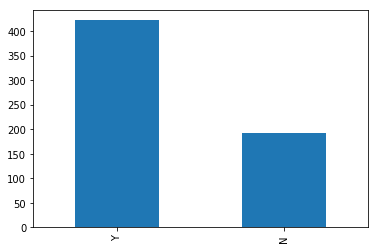

In [17]:
# to get the frequency
print('> Actual Count : \n'+str(train['Loan_Status'].value_counts()))

#Normalized Version to see it for a scale
print('> Normalized Version : \n'+str(train['Loan_Status'].value_counts(normalize=True)))

#plotting the values
train['Loan_Status'].value_counts().plot.bar()
plt.show()

Visualizing each attribute distribution
- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
- Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Categorical features


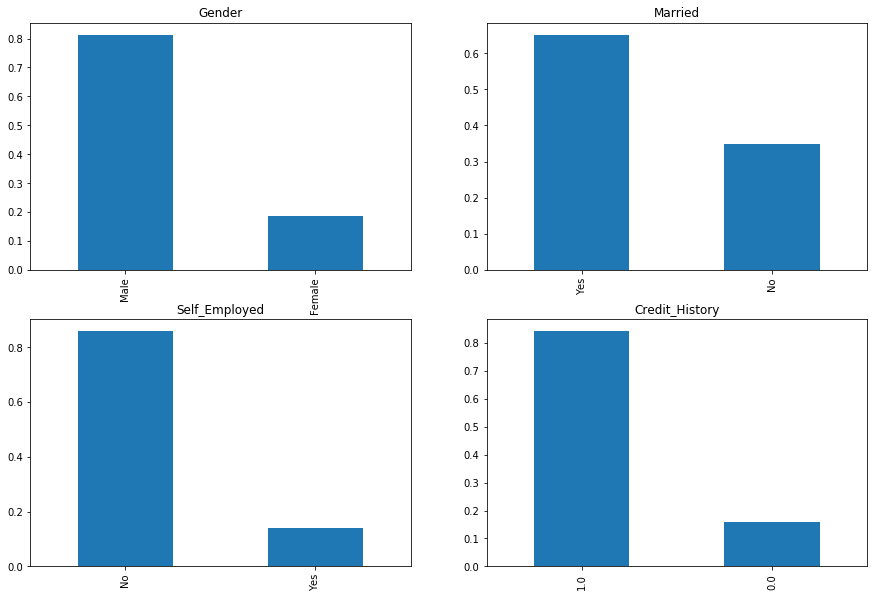

In [16]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10), title='Gender')
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

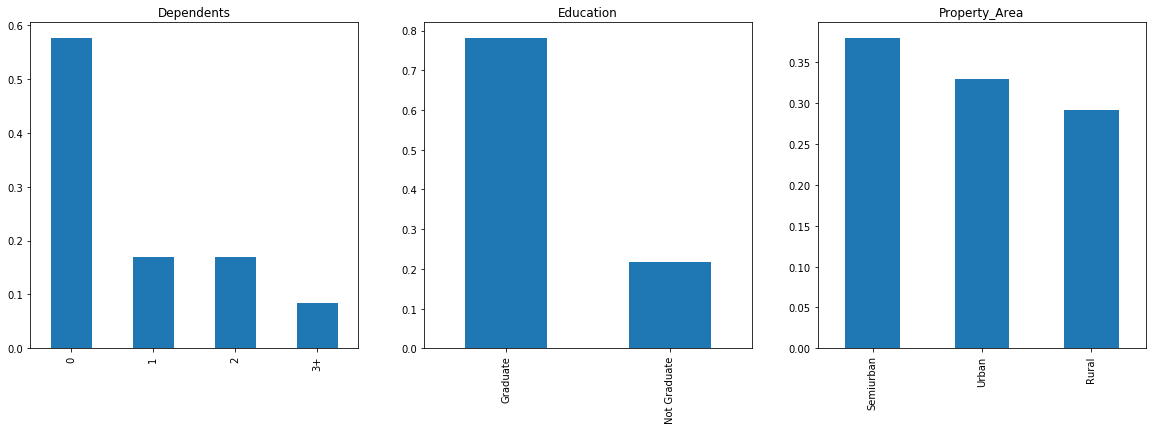

In [22]:
plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

### Inferences from the plots
1. 80% are Male
2. 65% are Married
3. ~85% are not Self-emplyed
4. ~85% have a credit history
6. around 58% of applicants have no dependents
7. Most of the applicats are graduates (~80%)
8. ~40% live in Semi urban Area, 35% in urban and 30% in rural

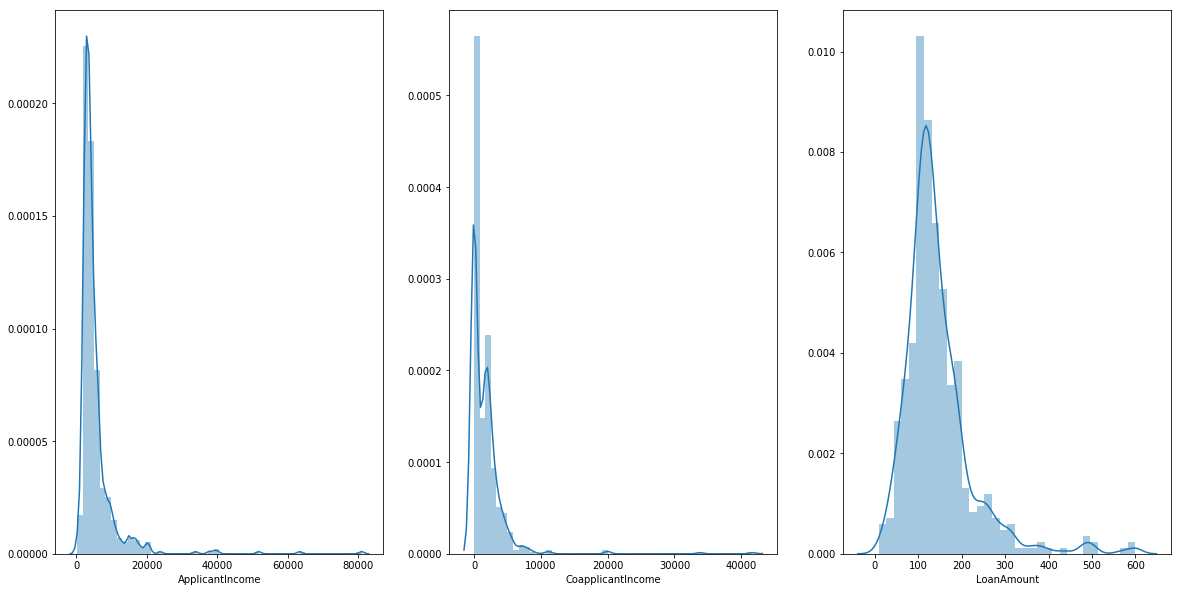

In [34]:
# for numerial Features we will see the distribution
plt.figure(figsize=(20,10))
# for ApplicantIncome
plt.subplot(131)
sns.distplot(train['ApplicantIncome'])
# for CoapplicantIncome
plt.subplot(132)
sns.distplot(train['CoapplicantIncome'])
# for LoanAmount
plt.subplot(133)
df=train.dropna()
sns.distplot(df['LoanAmount']); 
# for Loan_Amount_Term
plt.show()

From seeing the data we can draw some below conclusions
1. Applicants with high income should have more chances of loan approval.
2. Applicants who have repaid their previous debts should have higher chances of loan approval.
3. Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
4. Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

To get further proof lets perform Bivariate Analysis, where we compare each independent variable with the dependednt one to draw some conclusions.

<Figure size 288x288 with 0 Axes>

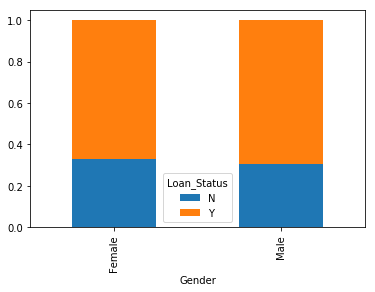

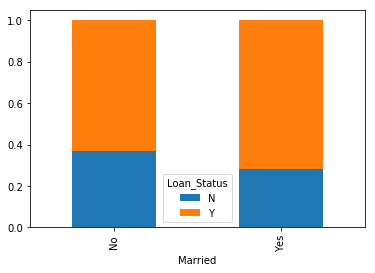

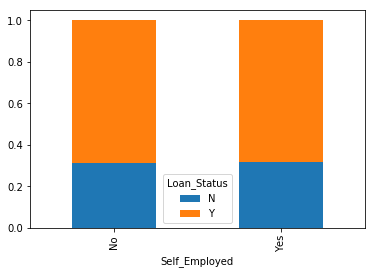

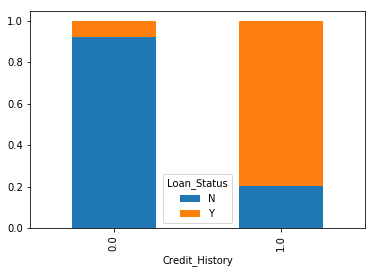

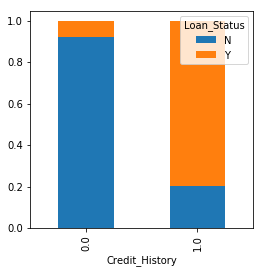

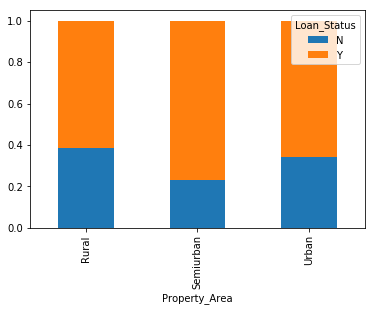

In [61]:
plt.figure(figsize=(4,4))
#fig, axes = plt.subplots(3,2)
# for Gender and Loan_Status
# plt.subplot(221)
gender = pd.crosstab(train['Gender'], train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
# for Married and Loan_Status
# plt.subplot(222)
married = pd.crosstab(train['Married'], train['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
# for Married and Loan_Status
# plt.subplot(223)
selfEmployed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
selfEmployed.div(selfEmployed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
# for Married and Loan_Status
# plt.subplot(224)
creditHist = pd.crosstab(train['Credit_History'], train['Loan_Status'])
creditHist.div(creditHist.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
#plt.show()
# Checking on the remaining variables
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
#plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
# fig.delaxes(axes[1,1]) #remove empty subplot
# plt.tight_layout()
plt.show()

### Conclusions from above Plots
- Marriage applicants have higher loan approval rate
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Visualizing Numerical Data
1. find mean income of people with approved and not approved loans.

In [70]:
loanStatus = train.groupby('Loan_Status')
loanStatus['ApplicantIncome'].mean()

train['ApplicantIncome'].min()

150

As we dont see any difference between mean salary of applicants with loans being both approved and not approved. we need to divide the Income into different bins and see who has got high chances of loan approval.

From the data we can see that min is 150 and max is 81000, lets divide the income into 4 bins namely 
- Low (0 - 27000)
- Medium(27000 - 54000)
- High(54000 - 81000)

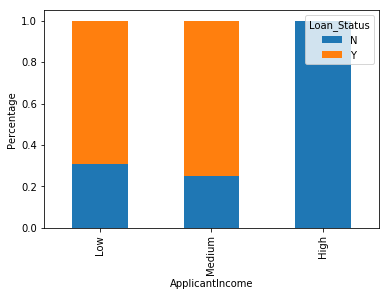

In [73]:
bins=[0,27000,54000,81000] 
group=['Low','Medium','High'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

### Corelation matrix
Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

Note - Correlation only works on numerical data so we will be converting some of the categorical features into numerical
eg - Loan Status (if Y - 1 else N - 0)

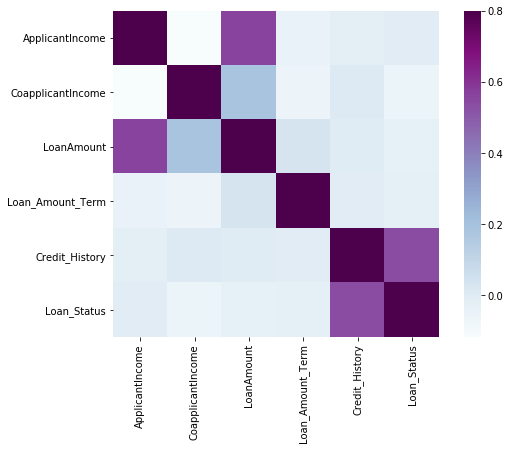

In [86]:
# Remove the unused columns 
train = train.drop(['Income_bin', 'Income_bin_Cat'], axis=1)
#converting loan status from categorical to numerical
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

matrix = train.corr() 
#f, ax = plt.subplots(figsize=(9, 6)) 
plt.figure(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### Data Preprocessing

1. Finding missing values - handling them by imputing

In [63]:
# to find the missing values 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

2. Handle the missing values 
    - For Categorical : Imputation using Mean/Median
    - For Numerical   : Imputation using Mode

In [81]:
#for categorical values we use mode to fill the elements
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Education'].fillna(train['Education'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
# for numeric values - 
# Loan_Amount_Term --- Ordinal Value as we have number of days so we can substitute null days with maximum value
#train['Loan_Amount_Term'].value_counts() #--- to get the ones repeating most
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

#Validate if we have any missing values left in the dataset
train.isnull().sum()

In [89]:
#apply the same methodologies for the missing values in the test data
#for categorical values we use mode to fill the elements
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Education'].fillna(train['Education'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
# for numeric values - 
# Loan_Amount_Term --- Ordinal Value as we have number of days so we can substitute null days with maximum value
#train['Loan_Amount_Term'].value_counts() #--- to get the ones repeating most
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Modelling
